# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## Odalys Barrionuevo
## <span style="color:blue">  Numerical exercises 6</span>


In Statistical Mechanics the one-dimensional (1D) Ising Model is exactly resoluble. The Hamiltonian for a system of N spins with nearest neighbors interaction is given by (in the following I will assume units such that $\mu_B=1$ and $k_B=1$):

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

where $\{ s_i \}_{i=1,N}$ are spin variables taking values in $\{-1;1\}$, $J>0$ (ferromagnetic model),and with the assumption $s_{N+1} = s_{1}$.

The partition function for $N$ spins, $Z$, can be exactly computed and it turns out to be:

$$
Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \lambda_1^N + \lambda_2^N
$$

where
$\lambda_{1,2} = 
e^{\beta J} 
\cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$, 
and where $\beta=\frac{1}{k_b T} = \frac{1}{T}$.
Once the partition function has been computed, the Helmholtz free energy is readly obtained as $A = -k_B T \ln Z$. All the thermodynamic quantities of interest can be deduced from $A$ or, equivalently, from $Z$:

- the **Internal Energy** per spin (with $h=0$):

$$
\frac{U(N,T)}{N} = \frac{\langle H \rangle}{N}
= \frac{1}{N} \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}
= -\frac{1}{N}\frac{\partial \ln Z}{\partial \beta}
\underset{h=0}= -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

### Exercise 06.1

Complete the NSL_simulator code to simulate a 1D Ising model with the Gibbs sampling algorithm (the Metropolis algorithm is already implemented) to sample the Boltzmann's weight $p(\{ s_i \}) = \exp(-\beta H)/Z$. Verify the possibility to restart from a previous spin configuration.

The code already computes the internal energy: $U(N,T) = \langle H \rangle$. Add the calculation of $C(N,T)$, $\chi(N,T)$, $M(N,T,h)$ and compute:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

as a function of $T$ in the range $\left[0.5;2.0\right]$ for a system of $N=50$ spins with $J=1$.

As usual, use data blocking and give an estimate of the statistical uncertainties.

- <span style="color:red">Show pictures of your estimations of $U(N,T)$, $C(N,T)$, $\chi(N,T)$, $M(N,T,h=0.02)$ and their uncertainties</span> obtained with a large number of *MC steps* (e.g. $M\ge 10^5$) compared with the exact curves. In the same picture show your results obtained with <span style="color:blue">both sampling methods, Metropolis and Gibbs</span>.

A Monte Carlo step will consist in trying to flip one time all the spins of the system. Do not forget to equilibrate your simulations and to use blocking average with blocks large enough.

## <span style="color:green"> Commento: </span>
<span style="color:green"> Nella seguente esercitazione viene simulato un modello di Ising 1D (con 50 spin e J = 1)  per studiare l'energia interna, il calore specifico, la magnetizzzazione e la suscettibilità al variare della temperatura usando due metodi di campionamento divesti: Metropolis e Gibbs. Dopo aver eseguito l'$equilibrazione^*$ di queste proprietà termodinamiche e coefficienti di risposta, i due metodi vengono confrontati con le curve esatte. </span>

<span style="color:green"> Dopo l'equilibrazione sono state calcolate le medie progressive e il rispettivo errore per le varie grandezze con 20 blocchi da 20000 passi l'uno. Per i grafici delle grandezze al variare della temperatura sono stati usati i risultati dell'ultimo blocco.</span>

<span style="color:green"> L'algoritmo di Gibbs in confronto a quello di metropolis ha un'accettazione che vale sempre 1 e impiega più tempo nel raggiungere l'equilibrio. Per quanto rigurda lo studio del calore specifico usando Gibbs sono stati aumentati i blocchi a 100 in quanto impiegava più tempo nel raggiungere il valore atteso.</span>

<span style="color:green"> $^*$ Per equilibrare il sistema si è partiti dalla temperatura $T=2.0$ e sono stati chiamati entrambi i metodi 700 volte. Per le successive equilibrazioni è stata sfruttata la configurazione di spin della simulazione precedente (in quanto le temperature sono vicine). Sotto viene riportata l'equilibrazione della magnetizzazione alle divese temperature, fatta sia con il metodo di Metropolis che di Gibbs.</span>

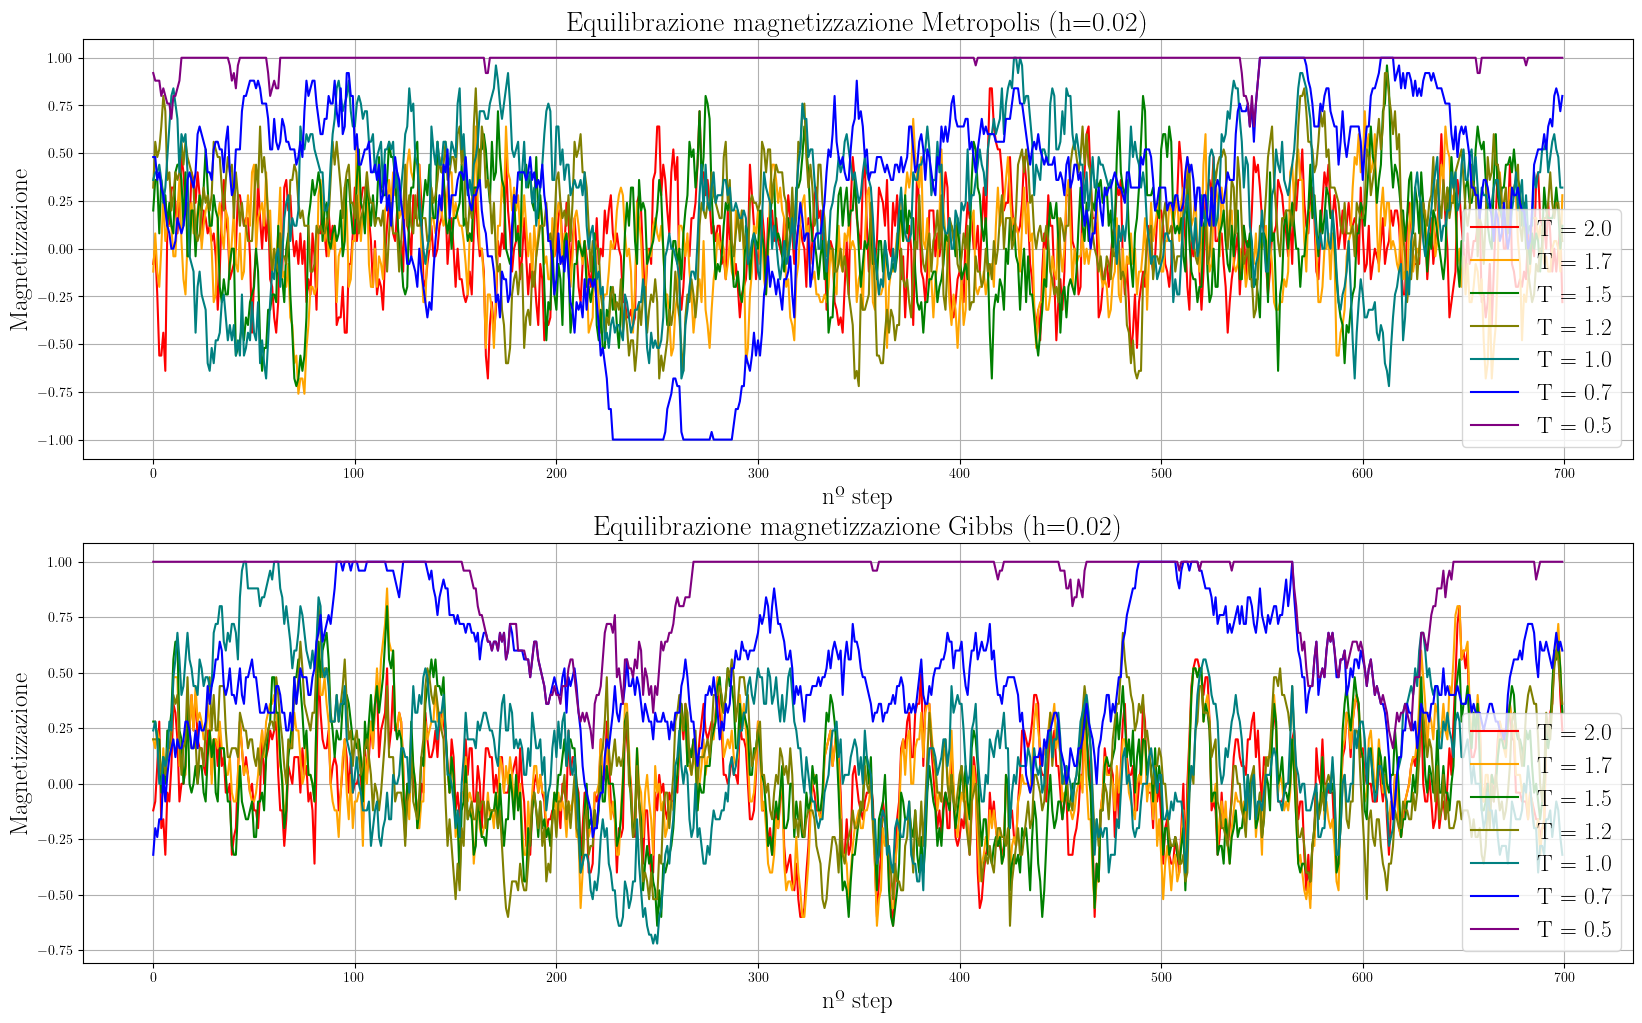

In [23]:
import matplotlib #per grafici
import matplotlib.pyplot as plt
import numpy as np #per avere i vettori
import math

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig, axes = plt.subplots(2, 1, figsize=(20, 12))

M = 700
N = 700
L = 1
x = np.arange(N)

m20M = np.loadtxt("magnetization(T=2.0)EM.dat", usecols=(1), unpack='true' )
m17M = np.loadtxt("magnetization(T=1.7)EM.dat", usecols=(1), unpack='true' )
m15M = np.loadtxt("magnetization(T=1.5)EM.dat", usecols=(1), unpack='true' )
m12M = np.loadtxt("magnetization(T=1.2)EM.dat", usecols=(1), unpack='true' )
m10M = np.loadtxt("magnetization(T=1.0)EM.dat", usecols=(1), unpack='true' )
m07M = np.loadtxt("magnetization(T=0.7)EM.dat", usecols=(1), unpack='true' )
m05M = np.loadtxt("magnetization(T=0.5)EM.dat", usecols=(1), unpack='true' )
m20G = np.loadtxt("magnetization(T=2.0)EG.dat", usecols=(1), unpack='true' )
m17G = np.loadtxt("magnetization(T=1.7)EG.dat", usecols=(1), unpack='true' )
m15G = np.loadtxt("magnetization(T=1.5)EG.dat", usecols=(1), unpack='true' )
m12G = np.loadtxt("magnetization(T=1.2)EG.dat", usecols=(1), unpack='true' )
m10G = np.loadtxt("magnetization(T=1.0)EG.dat", usecols=(1), unpack='true' )
m07G = np.loadtxt("magnetization(T=0.7)EG.dat", usecols=(1), unpack='true' )
m05G = np.loadtxt("magnetization.dat", usecols=(1), unpack='true' )

# Grafico con errore
axes[0].plot(x, m20M, color = 'red', label = 'T = 2.0')
axes[0].plot(x, m17M, color = 'orange', label = 'T = 1.7')
axes[0].plot(x, m15M, color = 'green', label = 'T = 1.5')
axes[0].plot(x, m12M, color = 'olive', label = 'T = 1.2')
axes[0].plot(x, m10M, color = 'teal', label = 'T = 1.0')
axes[0].plot(x, m07M, color = 'blue', label = 'T = 0.7')
axes[0].plot(x, m05M, color = 'purple', label = 'T = 0.5')
axes[0].set_title('Equilibrazione magnetizzazione Metropolis (h=0.02)', fontsize = 20)
axes[0].set_xlabel('nº step', fontsize = 18)
axes[0].set_ylabel('Magnetizzazione', fontsize = 18)
axes[0].legend(fontsize=17)
axes[0].grid(True)

axes[1].plot(x, m20G, color = 'red', label = 'T = 2.0')
axes[1].plot(x, m17G, color = 'orange', label = 'T = 1.7')
axes[1].plot(x, m15G, color = 'green', label = 'T = 1.5')
axes[1].plot(x, m12G, color = 'olive', label = 'T = 1.2')
axes[1].plot(x, m10G, color = 'teal', label = 'T = 1.0')
axes[1].plot(x, m07G, color = 'blue', label = 'T = 0.7')
axes[1].plot(x, m05G, color = 'purple', label = 'T = 0.5')
axes[1].set_title('Equilibrazione magnetizzazione Gibbs (h=0.02)', fontsize = 20)
axes[1].set_xlabel('nº step', fontsize = 18)
axes[1].set_ylabel('Magnetizzazione', fontsize = 18)
axes[1].legend(fontsize=17)
axes[1].grid(True)


plt.show()

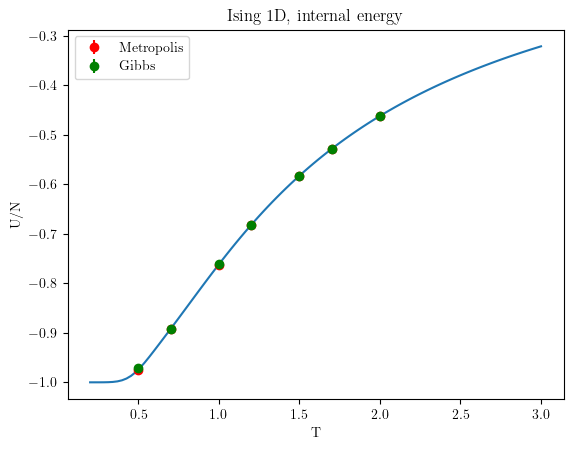

In [53]:
import numpy as np
import matplotlib.pyplot as plt
points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
plt.plot(T, e)

tm, mM, errorM = np.loadtxt('TotalEnergyM.dat', usecols=(0, 1, 2), unpack='true')
tG, mG, errorG = np.loadtxt('TotalEnergyG.dat', usecols=(0, 1, 2), unpack='true')
 
plt.errorbar(tM, mM, yerr = errorM, fmt='o', color = 'red', label = 'Metropolis')
plt.errorbar(tG, mG, yerr = errorG, fmt='o', color = 'green', label = 'Gibbs')

plt.title('Ising 1D, internal energy')
plt.xlabel('T')
plt.ylabel('U/N')
plt.legend()
plt.show()

- the **Heat Capacity** (with $h=0$):

$$
C(N,T) = \frac{\partial U(N,T)}{\partial T}
= \frac{\partial \beta}{\partial T}\frac{\partial U}{\partial \beta}
= -k_B\beta^2 \frac{\partial}{\partial \beta} \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z} \right] = \\
= -k_B\beta^2 \left[ -\sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \sum_{\{ s_i \}} H \exp \left( -\beta H\right)\frac{\partial Z^{-1}}{\partial \beta} \right] = \\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]\frac{1}{Z}\frac{\partial Z}{\partial \beta} \right\} =\\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} - \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]^2 \right\} =
k_B\beta^2 \left(\langle H^2 \rangle -\langle H \rangle^2 \right)
$$

$$
\frac{C(N,T)}{N} = \frac{1}{N}\frac{\partial U(N,T)}{\partial T} =\\
\underset{h=0}= 
k_B (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}
- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}
$$

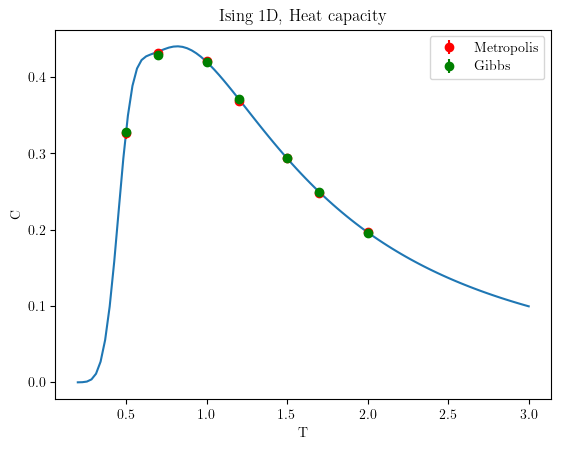

In [54]:
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
plt.plot(T, heat)

tm, mM, errorM = np.loadtxt('HeatCapacityM.dat', usecols=(0, 1, 2), unpack='true')
tG, mG, errorG = np.loadtxt('HeatCapacityG.dat', usecols=(0, 1, 2), unpack='true')
 
plt.errorbar(tM, mM, yerr = errorM, fmt='o', color = 'red', label = 'Metropolis')
plt.errorbar(tG, mG, yerr = errorG, fmt='o', color = 'green', label = 'Gibbs')

plt.title('Ising 1D, Heat capacity')
plt.xlabel('T')
plt.ylabel('C')
plt.legend()
plt.show()

- The **magnetization** (with $h \not= 0$):

Note that with $h=0$ the magnetization $M(N,T,h=0)=\langle \sum_{i=1,N}s_i \rangle =0$ because in 1D we cannot have a (ferromagnetic) phase transition in absence of an external magnetic field.

$$
M(N,T,h) = -\frac{\partial A}{\partial h} = k_B T \frac{\partial \ln Z}{\partial h} =
\frac{1}{\beta} \frac{1}{Z}\frac{\partial}{\partial h}\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} = \left\langle \sum_{i=1,N}s_i \right\rangle
$$

The exact formula from $M(N,T,h) = k_B T \dfrac{\partial \ln Z}{\partial h}$ is:
$$
\frac{M(N,T,h)}{N}=\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]
$$

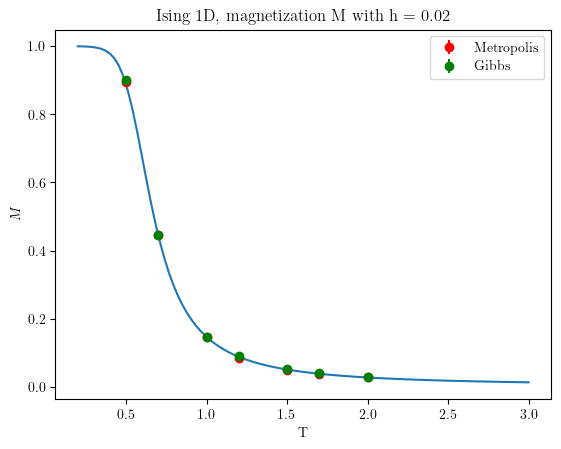

In [55]:
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

tm, mM, errorM = np.loadtxt('MagnetizationM.dat', usecols=(0, 1, 2), unpack='true')
tG, mG, errorG = np.loadtxt('MagnetizationG.dat', usecols=(0, 1, 2), unpack='true')
 
plt.errorbar(tM, mM, yerr = errorM, fmt='o', color = 'red', label = 'Metropolis')
plt.errorbar(tG, mG, yerr = errorG, fmt='o', color = 'green', label = 'Gibbs')

plt.plot(T, M)
plt.title('Ising 1D, magnetization M with h = 0.02')
plt.xlabel('T')
plt.ylabel('$M$')
plt.legend()
plt.show()

- The **magnetic susceptibility** (with $h=0$):

$$
\chi(N,T) = \frac{\partial M}{\partial h} = 
\frac{\partial}{\partial h}\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} =\\
= \beta\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right]^2 \frac{\exp \left( -\beta H\right)}{Z}
-\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z}
\frac{1}{Z}\frac{\partial Z}{\partial h} = 
\beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle - \left\langle \sum_{i=1,N}s_i \right\rangle^2 \right] = \\
\underset{h=0}= \beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle \right] = \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

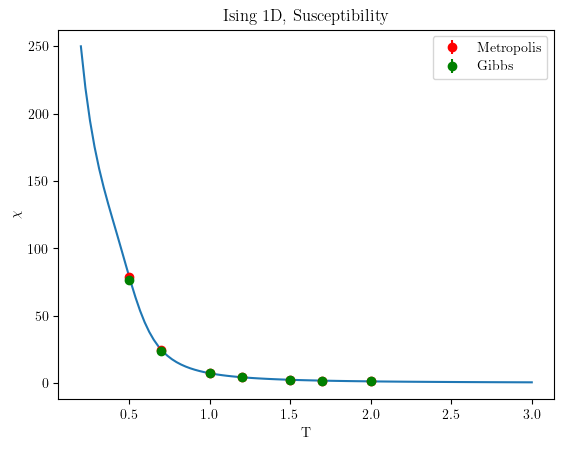

In [56]:
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
plt.plot(T, X)

tm, mM, errorM = np.loadtxt('SusceptibilityM.dat', usecols=(0, 1, 2), unpack='true')
tG, mG, errorG = np.loadtxt('SusceptibilityG.dat', usecols=(0, 1, 2), unpack='true')
 
plt.errorbar(tM, mM, yerr = errorM, fmt='o', color = 'red', label = 'Metropolis')
plt.errorbar(tG, mG, yerr = errorG, fmt='o', color = 'green', label = 'Gibbs')

plt.title('Ising 1D, Susceptibility')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.legend()
plt.show()